In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#We do not want the first three columns so.....
x=dataset.iloc[:,3:-1] #Independent Variables
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
#Dependent Variable
y=dataset.iloc[:,-1]
pd.DataFrame(y.head())

,Exited
0,1
1,0
2,1
3,0
4,0


Our aim is to predict whether the customer wil exit in the future. But the bank do not want to leave the customer.

In [8]:
pd.DataFrame(x["Geography"])

,Geography
0,France
1,Spain
2,France
3,France
4,Spain
...,...
9995,France
9996,France
9997,France
9998,Germany


In [9]:
x["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Encoding

In [10]:
#Create Dummy Variables (One Hot Encoding)
geography=pd.get_dummies(x["Geography"],drop_first=True)
geography.head()
#Removing the first column is..."Dummy Variable Trap"

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [11]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [12]:
x=pd.concat([x,geography,gender],axis=1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
x=x.drop(['Gender','Geography'],axis=1)
#we are droping the gender and geography coulumn because we have already made the dummy variables for those two columns...

In [14]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=0)
x_train.shape
#Total 11 features...

(8000, 11)

# Feature Scaling

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#Standard Scalar is nothing but Z-score Normalizarion  z = (x - Mean)/Std. Deviation
#Advantage of this over MinMax scalar is that, it helps in indentifying the outliers
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [17]:
import keras
import tensorflow.keras
#Keras is a library
from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
#what ever be the Neural Network we must import Sequential
from tensorflow.keras.layers import Dense
#Dense is to create Hidden Layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
#Activation functions
from tensorflow.keras.layers import Dropout
#Dropout is generally used with very deep neural network with a dataset of large number of parameters...
#If there are large no. of features then out model tends to overfit the data...so to solve this drop out is used by calculating dropout ratio
#Drop Out Ratio = (Activated neurons of a layer)/(Total no. of neurons of that particular layer)
#Good value for Dropout ratio is 0.5 to 0.8 

Using TensorFlow backend.


In [18]:
classifier = Sequential()
#Empty Neural Network

In [19]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#units is to add the number of neurons 6(here)...We can come to know how many neurons to be added by using hyperparameter Optimizing techniques 
#Kernel_initializer is used to initialize the weihts....
#he_uniform (or) he_normal works well with the ReLU activation function
#ReLU prevents from the Vanishing Gradient Problem
#input_dim is the input batch that is Input layer...


#1st - Input Layer with 11 neurons
#2nd - First Hidden Layer

In [20]:
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer = 'he_uniform',activation='relu'))

In [21]:
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
#This is binary Classification...so one out layer is only required.
#Uniform distribution (or) Glorot distribution works well with the Sigmoid function.
#last layer is Sigmoid because we need to predict either 1 or 0.
#That is whether the person will exit or not 

In [22]:
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Optimizers are Stochastic Gradient Descent(SGD), AdaDelta , AdaGrad,RMSPROP,adam
#Optimizers are used to decrease the Loss function
#Binary_crossentropy...because we are using classification problem 

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Fitting the ANN to the training set
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)
#No of epochs = 100
#Test data = 0.33
#Train data = 0.67
#batch_size is to reduce the Computational Power by taking only few records at a time. 


Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5848 - accuracy: 0.7231 - val_loss: 0.4917 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4704 - accuracy: 0.7972 - val_loss: 0.4623 - val_accuracy: 0.7940
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4454 - accuracy: 0.8028 - val_loss: 0.4460 - val_accuracy: 0.7978
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4272 - accuracy: 0.8080 - val_loss: 0.4322 - val_accuracy: 0.8042
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4116 - accuracy: 0.8169 - val_loss: 0.4174 - val_accuracy: 0.8111
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3943 - accuracy: 0.8313 - val_loss: 0.4012 - val_accuracy: 0.8258
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3786 - accuracy: 0.8451 - val_loss: 0.3907 - val_accuracy: 0.8353

Epoch 58/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.8593 - val_loss: 0.3545 - val_accuracy: 0.8557
Epoch 59/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3301 - accuracy: 0.8628 - val_loss: 0.3553 - val_accuracy: 0.8523
Epoch 60/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8628 - val_loss: 0.3534 - val_accuracy: 0.8554
Epoch 61/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8630 - val_loss: 0.3548 - val_accuracy: 0.8538
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8638 - val_loss: 0.3553 - val_accuracy: 0.8519
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3299 - accuracy: 0.8614 - val_loss: 0.3546 - val_accuracy: 0.8542
Epoch 64/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8632 - val_loss: 0.3540 - val_accuracy:

In [25]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


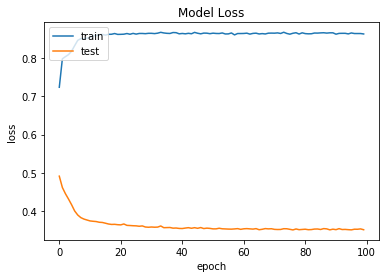

In [26]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix , accuracy_score
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
#0.5 is the thershold value for the sigmoid function.
#Greater than 0.5 then true else false

In [28]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1530,   65],
       [ 215,  190]], dtype=int64)

In [29]:
score = accuracy_score(y_pred,y_test)
score
#86.15% accuracy with the test data

0.86